In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
df = pd.read_csv('profiles.csv')
print(df.shape)
df.head()

(59946, 31)


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


<strong><h1> Main goals </h1></strong>


<h2><strong>Explore dataset</strong></h2>

<ul>- Check for missing data</ul>

<h3>Summary statistics</h3>
<ul>- Check for distribution</ul>
<ul>- Check metrics (average, median, min-max) </ul>
<ul>- Identify outliers</ul>

<h3>Exploratory data analysis</h3>
<ul>- Identify Correlations</ul>




In [139]:
# df is null percentage
df.isnull().sum() / df.shape[0] * 100

age             0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
essay0          9.154906
essay1         12.631368
essay2         16.077803
essay3         19.143896
essay4         17.577486
essay5         18.099623
essay6         22.972342
essay7         20.770360
essay8         32.070530
essay9         21.023922
ethnicity       9.475194
height          0.005005
income          0.000000
job            13.675641
last_online     0.000000
location        0.000000
offspring      59.321723
orientation     0.000000
pets           33.231575
religion       33.740366
sex             0.000000
sign           18.443266
smokes          9.194942
speaks          0.083408
status          0.000000
dtype: float64

In [140]:
df_new = df.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'income'], axis=1)

df_new.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [141]:
df_new.drinks.value_counts()

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64

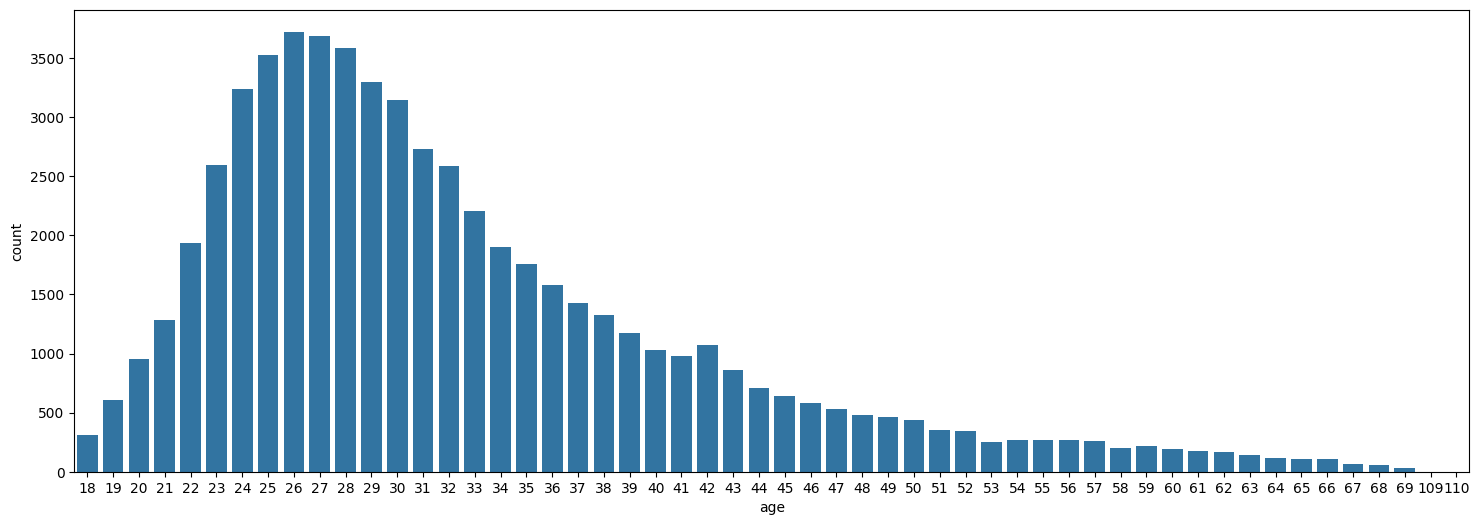

In [142]:
# plot drinks vs drugs
plt.figure(figsize=(18, 6))
sns.countplot(data=df_new, x='age')
plt.show()

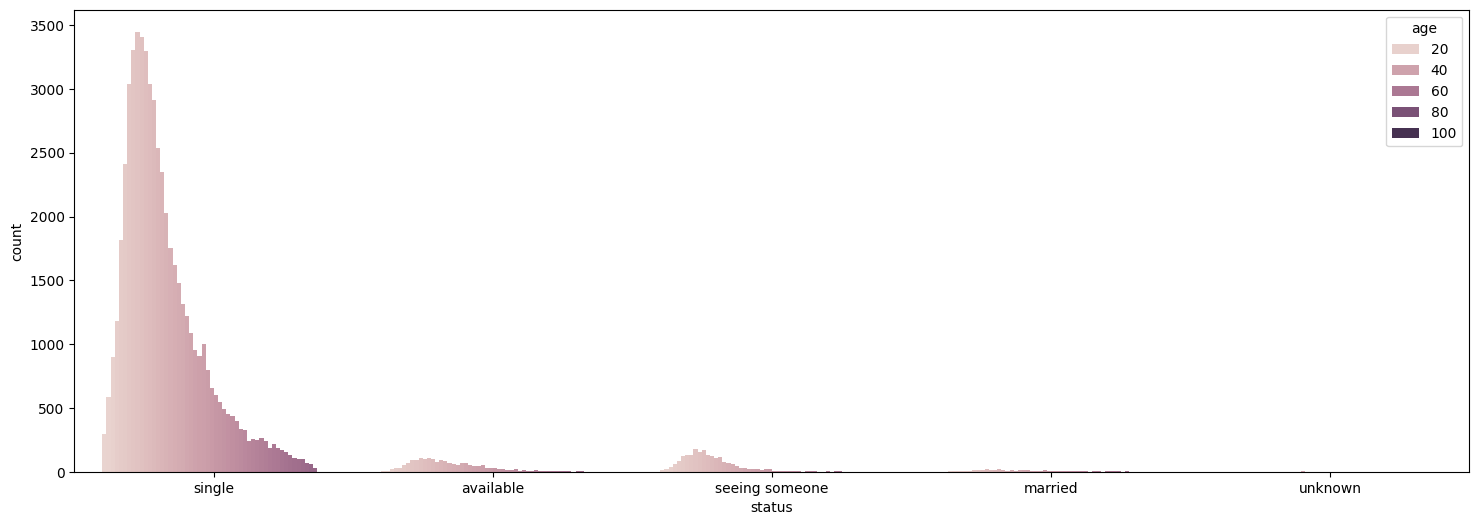

In [143]:
# plot ages vs status
plt.figure(figsize=(18, 6))
sns.countplot(data=df_new, x='status', hue='age')
plt.show()

In [144]:
df_new.orientation.value_counts(normalize=True) * 100

orientation
straight    86.087479
gay          9.296700
bisexual     4.615821
Name: proportion, dtype: float64

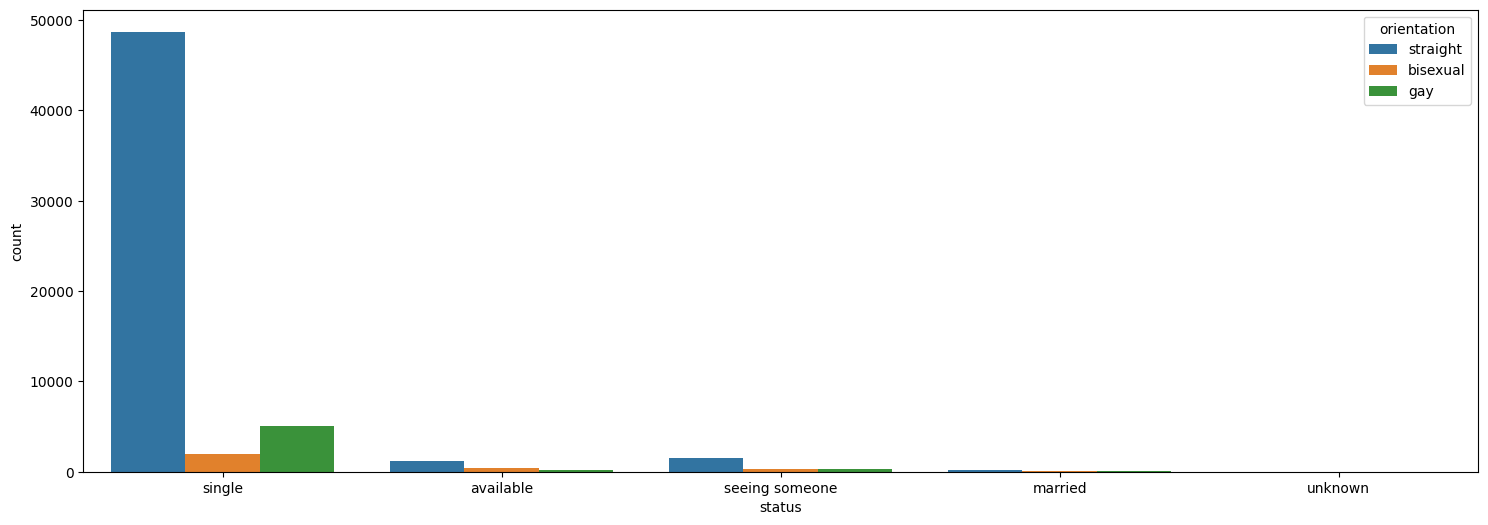

In [145]:
# plot status vs orientation
plt.figure(figsize=(18, 6))
sns.countplot(data=df_new, x='status', hue='orientation')
plt.show()

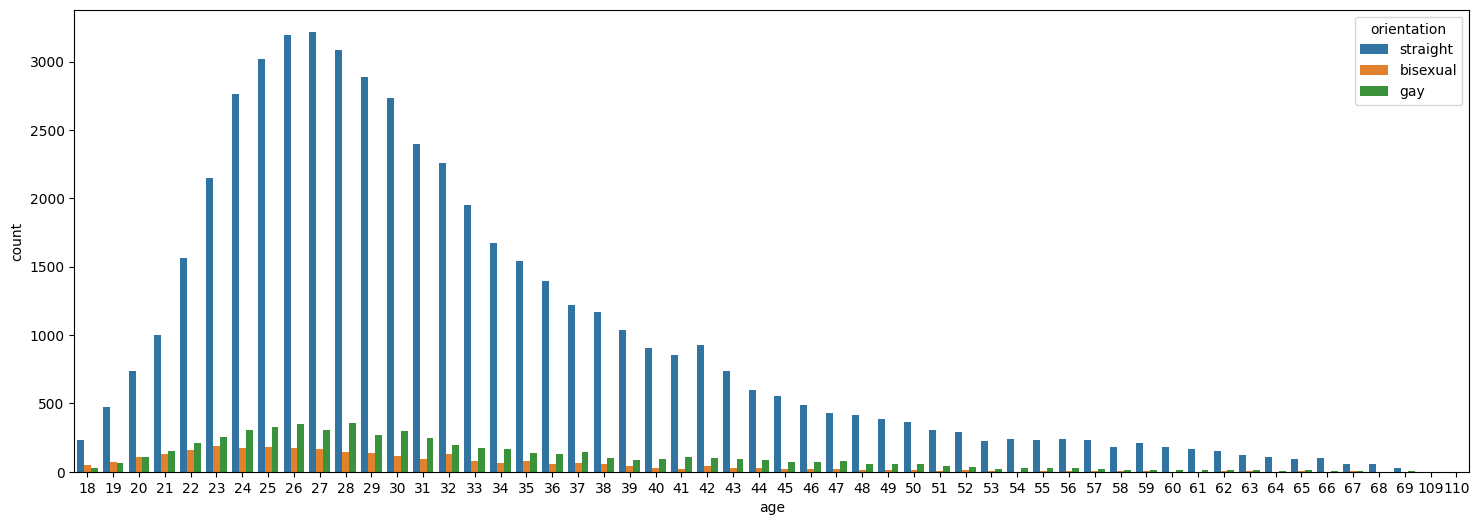

In [146]:
# plot age vs orientation
plt.figure(figsize=(18, 6))
sns.countplot(data=df_new, x='age', hue='orientation')
plt.show()

# Pre processing data #

<h3>Adjusting data ordinality to encode labels for our model is an important step, with other non ordinal variables there are ways to apply some technique of feature engineering to make things look better, like transforming the last_online feature to amount of weeks since last online, and transforming the features spoken to amout of languages spoken.</h3>

<h5>ps: In this specific notebook im not going to use the essay's feature due to the complexity of analyzing this amount of text features, but for sure there is some important content there.</h5>

In [147]:
# Adjusting the data ordinality
df_new['drinks'] = df_new.drinks.map({'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5})
df_new['drugs'] = df_new.drugs.map({'never': 0, 'sometimes': 1, 'often': 2})
df_new['smokes'] = df_new.smokes.map({'no': 0, 'trying to quit': 1, 'when drinking': 2, 'sometimes': 3, 'yes': 4})
df_new['body_type'] = df_new.body_type.map({
    'rather not say': 0,
    'skinny': 1,
    'thin': 2,
    'athletic': 3,
    'jacked': 4,
    'fit': 5,
    'average': 6,
    'curvy': 7,
    'a little extra': 8,
    'full figured': 9,
    'overweight': 10,
    'used up': 11
})


ordinal_education = {
    'dropped out of high school': 1,
    'working on high school': 2,
    'high school': 3,
    'graduated from high school': 4,
    'dropped out of space camp': 5,
    'working on space camp': 6,
    'space camp': 7,
    'graduated from space camp': 8,
    'dropped out of two-year college': 9,
    'working on two-year college': 10,
    'two-year college': 11,
    'graduated from two-year college': 12,
    'dropped out of college/university': 13,
    'working on college/university': 14,
    'college/university': 15,
    'graduated from college/university': 16,
    'dropped out of masters program': 17,
    'working on masters program': 18,
    'masters program': 19,
    'graduated from masters program': 20,
    'dropped out of law school': 21,
    'working on law school': 22,
    'law school': 23,
    'graduated from law school': 24,
    'dropped out of med school': 25,
    'working on med school': 26,
    'med school': 27,
    'graduated from med school': 28,
    'dropped out of ph.d program': 29,
    'working on ph.d program': 30,
    'ph.d program': 31,
    'graduated from ph.d program': 32,
    np.nan: np.nan  # keeping NaN values intact
}

df_new['education'] = df_new.education.map(ordinal_education)

In [148]:
# change last_online to the amount of weeks since max last online
from datetime import datetime
df_new['last_online'] = pd.to_datetime(df_new['last_online'].str[:10], format='%Y-%m-%d')
df_new['last_online'] = (df_new['last_online'].max() - df_new['last_online']) / 7

# change speaks to the amount of languages spoken
df_new['speaks'] = df_new['speaks'].fillna('').str.split(',').apply(lambda x: len(x))

# split location into city and country
df_new['city'] = df_new['location'].str.split(',').str.get(0)
df_new['country'] = df_new['location'].str.split(',').str.get(1)
df_new = df_new.drop(['location'], axis=1)

df_new.status = df_new.status.map({'single': 0, 'available': 1, 'seeing someone': 2, 'married': 3})

In [149]:
for col in df_new.columns:
    print(col)
    print(df_new[col].nunique())

age
54
body_type
12
diet
18
drinks
6
drugs
3
education
32
ethnicity
217
height
60
job
21
last_online
371
offspring
15
orientation
3
pets
15
religion
45
sex
2
sign
48
smokes
5
speaks
5
status
4
city
198
country
41


In [150]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in df_new.columns:
    if df_new[col].dtype == 'object':
        df_new[col] = encoder.fit_transform(df_new[col].astype(str))

In [151]:
from sklearn.impute import KNNImputer

# Separate the target variable and features
y = df_new['age']
X = df_new.drop(['age', 'last_online'], axis=1)

# Create a KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
X_imputed = imputer.fit_transform(X)

# Convert the imputed result to a DataFrame
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

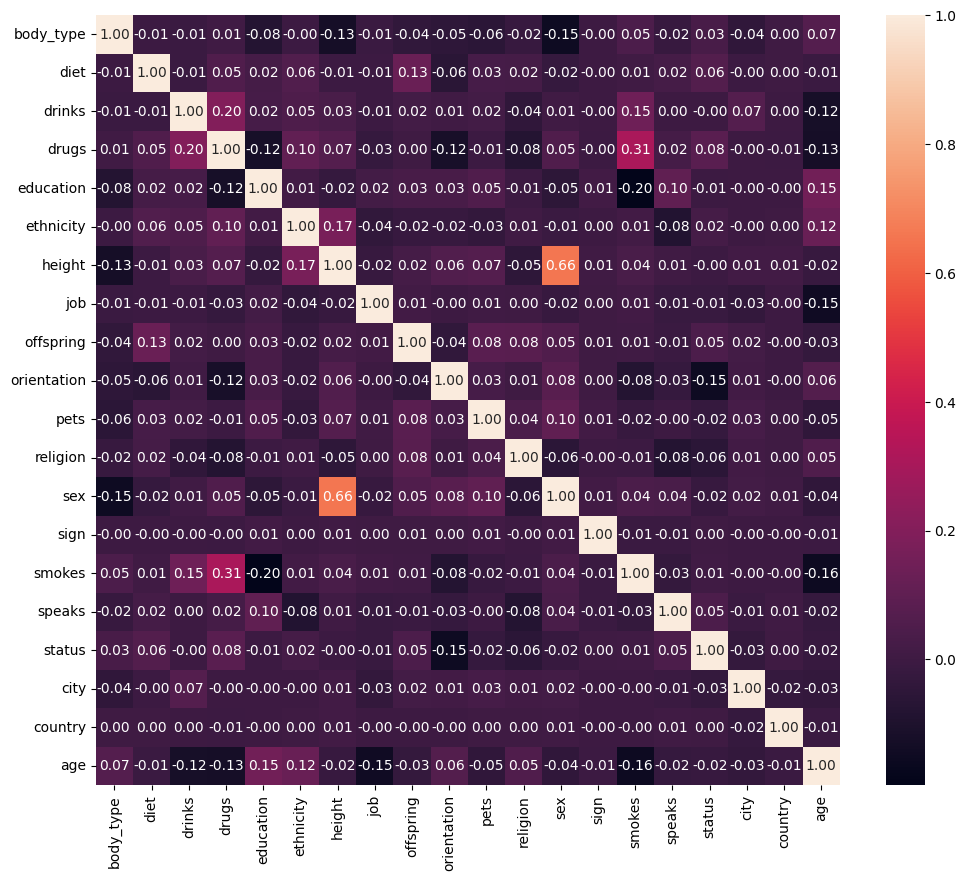

In [152]:
# concat the target variable with the imputed features
df_imputed = pd.concat([X_imputed, y], axis=1)

corr = df_imputed.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

# Training and evaluating #
<h3>Right now im going to train a base model to predict the age of the people on the app based on the features, this model gonna serve as an parameter of the most simple model that we can do, and from here, try to improve.</h3>

In [153]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df_imputed.drop(['age'], axis=1)
y = df_imputed['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [154]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')

y_pred_test = model.predict(X_train)
mae_train = np.mean(np.abs(y_train - y_pred_test))
print(f'Mean Absolute Error (train): {mae_train}')

Mean Squared Error: 58.25228449655022
Mean Absolute Error: 5.755978871943551
Mean Absolute Error (train): 2.1373457888646605


In [155]:
# feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]})")

Feature ranking:
1. offspring (0.18381057201706621)
2. job (0.11549118175561483)
3. education (0.09895835441990959)
4. sign (0.07668537223937377)
5. height (0.07126936632606393)
6. religion (0.06924253977208869)
7. city (0.06321247371446385)
8. body_type (0.05139150044773693)
9. pets (0.04559433173663437)
10. ethnicity (0.04555322192062746)
11. diet (0.03964114295272267)
12. drinks (0.030764684381902732)
13. speaks (0.028188474074037306)
14. smokes (0.026985144142253194)
15. drugs (0.020332323185082605)
16. orientation (0.013636968759622769)
17. sex (0.010006819818458615)
18. status (0.009082995204172557)
19. country (0.00015253313216803978)


# Feature selection # 
<h3>In a try of making thnigs faster, and more precise, we apply feature selection to reduce complexity off the model, applying a feature selection of 10 features. </br>
Which kind wont worked, its a signal that our model is not overfitted, more probably underfitted. Its possible to see this because the model after the feature selection performs worst than without it, at least in a first analysis. </h3>

In [156]:
# implement forward selection to 10 features
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create a list to store the selected features
selected_features = []
# Create a list to store the MSE
mse_list = []

# Create a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a list to store the features
features = X.columns

# Create a loop to select the features
for i in range(10):
    # Create a list to store the MSE
    mse_list = []
    # Create a loop to iterate through the features
    for feature in features:
        # Create a copy of the selected features
        selected_features_copy = selected_features.copy()
        # Add the feature to the selected features
        selected_features_copy.append(feature)
        # Train the model
        model.fit(X_train[selected_features_copy], y_train)
        # Make a prediction
        y_pred = model.predict(X_test[selected_features_copy])
        # Calculate the MSE
        mse = mean_squared_error(y_test, y_pred)
        # Append the MSE to the mse_list
        mse_list.append(mse)
    # Find the feature that has the lowest MSE
    best_feature = features[np.argmin(mse_list)]
    # Add the best feature to the selected features
    selected_features.append(best_feature)
    # Remove the best feature from the features
    features = features.drop(best_feature)

print(selected_features)

['offspring', 'education', 'smokes', 'country', 'status', 'drinks', 'orientation', 'sex', 'drugs', 'job']


In [157]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model_fs = RandomForestRegressor(n_estimators=100, random_state=42)
model_fs.fit(X_train[selected_features], y_train)

y_pred = model_fs.predict(X_test[selected_features])

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

mae = np.mean(np.abs(y_test - y_pred))
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 66.97010238838894
Mean Absolute Error: 6.072903992373996


In [158]:
# import bayes search for hyperparameter tuning
from skopt import BayesSearchCV
from sklearn.model_selection import cross_val_score

# define the model
model = RandomForestRegressor()

# define the search space
search_space = {
    'n_estimators': (10, 200),
    'max_depth': (1, 100),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 10)
}

# define the search
search = BayesSearchCV(model, search_space, n_iter=50, n_jobs=-1, cv=10)

np.int = int
# perform the search
search.fit(X_train[selected_features], y_train)

# report the best result
print(search.best_score_)
print(search.best_params_)

0.34560525737455833
OrderedDict([('max_depth', 14), ('min_samples_leaf', 7), ('min_samples_split', 10), ('n_estimators', 165)])


In [160]:
model_bs = RandomForestRegressor(**search.best_params_, random_state=42)
model_bs.fit(X_train, y_train)

y_pred_bs = model_bs.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred_bs)
print(f'Mean Squared Error: {mse}')

mae = np.mean(np.abs(y_test - y_pred_bs))
print(f'Mean Absolute Error: {mae}')

y_pred_train = model_bs.predict(X_train)
mae_train = np.mean(np.abs(y_train - y_pred_train))
print(f'Mean Absolute Error (train): {mae_train}')

Mean Squared Error: 56.87051781635973
Mean Absolute Error: 5.64799638620774
Mean Absolute Error (train): 4.864339005177424


# Conclusions #
<h4>What we can conclude from the study in here is that we have a ton of valuable data, for anwser some questions about these apps of dating.</h4>

<h4>Some features after analyzing the dataset are removed, due to the trickness or complexity of the analysis, like the essays feature, that is a bunch of text of each user describing himselfs, i have sure that there is a lot of valuable data, but for our study in here its kinda out of hand to analyze this texts.</h4>

<h4>In this specific notebook we've choose to predict the age of the user based on its features and the results are pretty great, in a base model was possible to predict with a mean absolute error of 5.7 to the test set, which means that our model was able to predict ages with a error of 5.7 in average.</h4>

<h4>Trying to increase the model accuracy one of the tries was to make feature selection due to the amount of features that our base model had to deal with, so from the 19 features was made and method to select some of those features, 10 features to bem more precise, and the results are not really the expected, our base model showed a performance of 5.7 in Mean Absolute Error (MAE) and after the forward selection the MAE metric was 6.07, which indicates that our model is getting worst by removing some features. </h4>

<h4>After that failed try of feature selection, it was time to hyper-parameter tuning, with the original set of features, in this process was possible to increase the model and have a MAE of 5.64, a slight increase, but maybe with more interations or a bigger parameters grid is possible to increase even more.</h4>

# Next steps #
<h4>Like already said before there is some limitations of the study above, like removing some text features or even another features with a low amount of informations (for example income), these features in a more deep analysis can have an great amount of information and be pretty valuable.

Analyzing another models or even another target variable could be a pretty good way to discover even more about the whole dataset.
</h4>